<a href="https://colab.research.google.com/github/ClaytonSdS/UberDriver/blob/main/UberDriverAnalysis_Sep2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **My Personal Uber Driver Analysis**
### Process Phase
---

##**About the data collection process**
The data was collected when I was working as an Uber driver in September 2023.  
For privacy reasons, users information was deleted, and I did not specify whether the trips were UberX or VIP.
Therefore, all the rides will be treated as typical Uber rides.


---



###**About the sample and some disclamers**

These data were populated by hand after a meticulous analysis. However, typing errors could be present in the data.

Furthermore, the sample size is relatively small, considering all the possible neighborhoods in my city. Therefore, the sample may not accurately represent the entire population.

Nevertheless, for the purpose of the project, it is possible to get useful insights, especially regarding my own rides, profits, the development of analytical skills and other aspects.

---



### Checking and processing the data

**Importing general useful libraries**


In [ ]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data =  pd.read_csv('UberDriverData_June2023.txt', sep=";", quotechar='"')

In [ ]:
data

,date,ride_starting_time,origin,destination,total_price_brl,dynamic_price,distance_in_meters,duration_in_seconds
0,"Monday, June 12th, 2023",07:36,Jardim Sao Marcos,Centro,11.63,0.00,6000,721
1,"Monday, June 12th, 2023",11:26,Vila Cordula,Centro,5.51,0.00,1800,427
2,"Monday, June 12th, 2023",11:40,Centro,Gaivota,31.36,0.00,8400,1534
3,"Monday, June 12th, 2023",12:12,Vista Alegre,Vila Diniz,8.26,0.00,3500,466
4,"Monday, June 12th, 2023",17:03,15090-120,Jardim Herculano,10.19,0.00,3600,1007
...,...,...,...,...,...,...,...,...
216,"Friday, June 30th, 2023",17:31,Vila Redentora,Bom Jardim,6.32,0.00,2300,546
217,"Friday, June 30th, 2023",17:47,Bom Jardim,Jardim Walkiria,7.26,1.75,1000,277
218,"Friday, June 30th, 2023",17:50,Boa Vista,Vila Sao Jose,9.25,1.50,4000,642
219,"Friday, June 30th, 2023",18:06,Nova Redentora,Jardim Maracana,11.27,5.50,2000,535


Checking for typing errors.




In [ ]:
data['date'].head().values

array(['Monday, June 12th, 2023', 'Monday, June 12th, 2023',
       'Monday, June 12th, 2023', 'Monday, June 12th, 2023',
       'Monday, June 12th, 2023'], dtype=object)

In [ ]:
data['origin'].head().values

array([' Jardim Sao Marcos', ' Vila Cordula', ' Centro', ' Vista Alegre',
       ' 15090-120'], dtype=object)

In [ ]:
data['ride_starting_time'].head().values

array([' 07:36', ' 11:26', ' 11:40', ' 12:12', ' 17:03'], dtype=object)

It was found that the 'origin' and 'ride_starting_time' data have extra spaces at the beginning of the strings.

To solve this problem, it's necessary to strip and replace all these strings.

In [ ]:
data['ride_starting_time'] = np.array([data['ride_starting_time'].values[X].strip() for X in range(len(data['ride_starting_time'].values))])
data['origin'] = np.array([data['origin'].values[X].strip() for X in range(len(data['origin'].values))])


#### Replacing ride_starting_time and origin to the correct format using .strip()




Checking data by a plot graph using 'ride_starting_time' in x-axis and 'distance_in_meters' in y-axis.

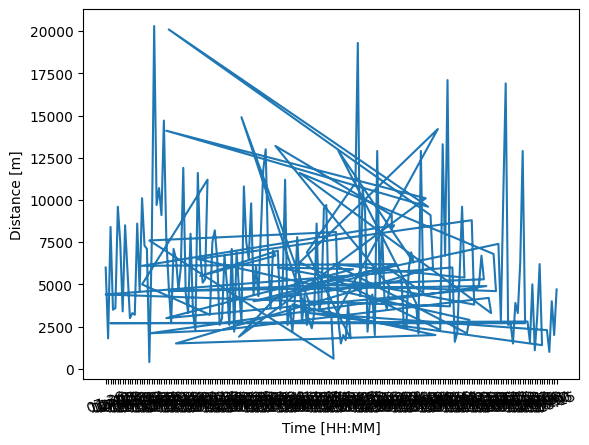

In [ ]:
plt.plot(data['ride_starting_time'], data['distance_in_meters'])
plt.xticks(rotation=20)
plt.xlabel("Time [HH:MM]")
plt.ylabel("Distance [m]");

**Hypothesis:** The cause of these noise could be due to different rows that contain the same time in HH:MM.

In mathematical terms, we have f(x₁) = y₁ and f(x₁) = y₂, so an element of the domain has two values in the codomain.

Where f(x) represents distance_in_meters and x the ride_starting_time variable.

**Importing some useful libraries to solve this problem**



In [ ]:
from datetime import datetime
from dateutil.parser import parse

Merging the 'date' column and the 'ride_starting_time' column together so that we can convert them into a single datetime object using .parse()

In [ ]:
data_time_merged = [' '.join([data['date'][item], data['ride_starting_time'][item]]) for item in range(len(data))]
data['data_time_merged'] = data_time_merged

In [ ]:
data.head(4)

,date,ride_starting_time,origin,destination,total_price_brl,dynamic_price,distance_in_meters,duration_in_seconds,data_time_merged
0,"Monday, June 12th, 2023",07:36,Jardim Sao Marcos,Centro,11.63,0.0,6000,721,"Monday, June 12th, 2023 07:36"
1,"Monday, June 12th, 2023",11:26,Vila Cordula,Centro,5.51,0.0,1800,427,"Monday, June 12th, 2023 11:26"
2,"Monday, June 12th, 2023",11:40,Centro,Gaivota,31.36,0.0,8400,1534,"Monday, June 12th, 2023 11:40"
3,"Monday, June 12th, 2023",12:12,Vista Alegre,Vila Diniz,8.26,0.0,3500,466,"Monday, June 12th, 2023 12:12"


In [ ]:
parse_data = [parse(data['data_time_merged'][datetime]) for datetime in range(len(data))]
data['parsed_datatime'] = parse_data

Checking the results in the dataframe

In [ ]:
data.head(2)

,date,ride_starting_time,origin,destination,total_price_brl,dynamic_price,distance_in_meters,duration_in_seconds,data_time_merged,parsed_datatime
0,"Monday, June 12th, 2023",07:36,Jardim Sao Marcos,Centro,11.63,0.0,6000,721,"Monday, June 12th, 2023 07:36",2023-06-12 07:36:00
1,"Monday, June 12th, 2023",11:26,Vila Cordula,Centro,5.51,0.0,1800,427,"Monday, June 12th, 2023 11:26",2023-06-12 11:26:00


Checking the results in the previous plot graph

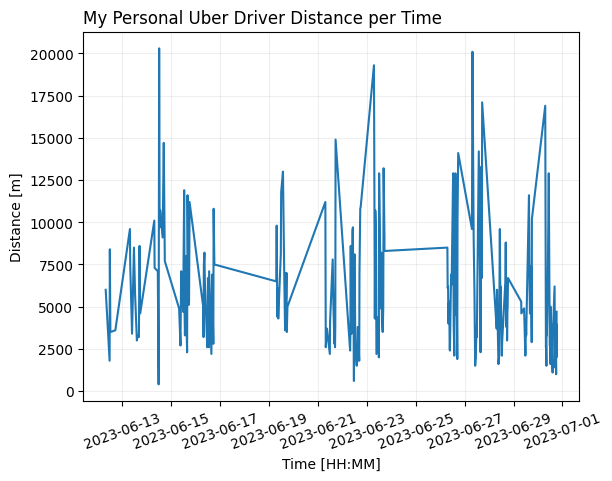

In [ ]:
plt.plot(data['parsed_datatime'], data['distance_in_meters'])
plt.xticks(rotation=20)
plt.grid(True, alpha=0.2)
plt.title("My Personal Uber Driver Distance per Time", loc='left')
plt.xlabel("Time [HH:MM]")
plt.ylabel("Distance [m]");

**Preliminar Conclusion:** It looks like the domain problem was solved.


---



**Checking for potential outliers**

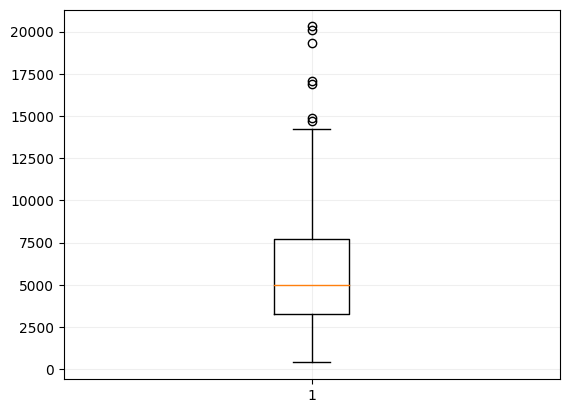

In [ ]:
plt.grid(True, alpha=0.2)
plt.boxplot(data['distance_in_meters']);

In [ ]:
data['distance_in_meters'].describe()

count      221.000000
mean      5974.208145
std       3734.679606
min        400.000000
25%       3300.000000
50%       5000.000000
75%       7700.000000
max      20300.000000
Name: distance_in_meters, dtype: float64

Searching for the possible outliers based on the Upper Whisker



In [ ]:
Q1 = data["distance_in_meters"].quantile(0.25)
Q3 = data["distance_in_meters"].quantile(0.75)
IQR = Q3 - Q1
Upper_Whisker = Q3 + (1.5 * IQR)

In [ ]:
data.loc[data['distance_in_meters'] > Upper_Whisker]

,date,ride_starting_time,origin,destination,total_price_brl,dynamic_price,distance_in_meters,duration_in_seconds,data_time_merged,parsed_datatime
21,"Wednesday, June 14th, 2023",12:04,Residencial Nato Vetorasso,Belvedere,25.36,2.25,20300,1422,"Wednesday, June 14th, 2023 12:04",2023-06-14 12:04:00
25,"Wednesday, June 14th, 2023",16:36,Parque Industrial,Schimidt,24.31,0.00,14700,1693,"Wednesday, June 14th, 2023 16:36",2023-06-14 16:36:00
88,"Wednesday, June 21st, 2023",17:16,Vila Sinibaldi,Parque das Amoras II,25.68,0.00,14900,1550,"Wednesday, June 21st, 2023 17:16",2023-06-21 17:16:00
110,"Friday, June 23rd, 2023",06:57,Schimidt,Jardim Vivendas,37.14,0.00,19300,2648,"Friday, June 23rd, 2023 06:57",2023-06-23 06:57:00
149,"Tuesday, June 27th, 2023",07:39,Cedral,Jardim Morumbi,37.14,0.00,20100,1306,"Tuesday, June 27th, 2023 07:39",2023-06-27 07:39:00
161,"Tuesday, June 27th, 2023",17:09,Vila Sao Jose,Jardim Nunes,22.22,0.00,17100,1689,"Tuesday, June 27th, 2023 17:09",2023-06-27 17:09:00
197,"Friday, June 30th, 2023",07:05,Estância Nossa Sra. de Fátima,Jardim Maracana,23.75,0.00,16900,1606,"Friday, June 30th, 2023 07:05",2023-06-30 07:05:00


Since there are no incorrect values among these outliers, in other words, the distance values are consistent, they should not be removed because they can provide valuable insights about distant rides, taking into account profit and time.

Besides that, for machine learning purposes, we'll use a random forest model, which is less sensitive to outliers like these.


---



**Checking for NaN and empty values in the dataframe**

In [ ]:
data_col = data.columns.values

In [ ]:
check_nan_values = {x:data[x].isnull().values.any() for x in data_col}
check_nan_values

{'date': False,
 'ride_starting_time': False,
 'origin': False,
 'destination': False,
 'total_price_brl': False,
 'dynamic_price': False,
 'distance_in_meters': False,
 'duration_in_seconds': False,
 'data_time_merged': False,
 'parsed_datatime': False}

In [ ]:
check_empty_values = {x:data[data[x] == ''].index.values for x in data_col}
check_empty_values

{'date': array([], dtype=int64),
 'ride_starting_time': array([], dtype=int64),
 'origin': array([], dtype=int64),
 'destination': array([], dtype=int64),
 'total_price_brl': array([], dtype=int64),
 'dynamic_price': array([], dtype=int64),
 'distance_in_meters': array([], dtype=int64),
 'duration_in_seconds': array([], dtype=int64),
 'data_time_merged': array([], dtype=int64),
 'parsed_datatime': array([], dtype=int64)}

### Preparing the data for viz

####**My personal car's economic data.**

######Collected on September 19, 2023.



In [ ]:
mileage = 11.4 # [km/L]
fuel_price = 3.49 #[R$/L] -
mileage_brl = mileage/fuel_price #[km/R$]

distance_in_km = data['distance_in_meters']/1000
raw_ride_price =  distance_in_km/ mileage_brl # [R$]

In [ ]:
data['raw_ride_price'] = raw_ride_price

In [ ]:
data['profit'] = data['total_price_brl'] - data['raw_ride_price']

In [ ]:
data

,date,ride_starting_time,origin,destination,total_price_brl,dynamic_price,distance_in_meters,duration_in_seconds,data_time_merged,parsed_datatime,raw_ride_price,profit
0,"Monday, June 12th, 2023",07:36,Jardim Sao Marcos,Centro,11.63,0.00,6000,721,"Monday, June 12th, 2023 07:36",2023-06-12 07:36:00,1.836842,9.793158
1,"Monday, June 12th, 2023",11:26,Vila Cordula,Centro,5.51,0.00,1800,427,"Monday, June 12th, 2023 11:26",2023-06-12 11:26:00,0.551053,4.958947
2,"Monday, June 12th, 2023",11:40,Centro,Gaivota,31.36,0.00,8400,1534,"Monday, June 12th, 2023 11:40",2023-06-12 11:40:00,2.571579,28.788421
3,"Monday, June 12th, 2023",12:12,Vista Alegre,Vila Diniz,8.26,0.00,3500,466,"Monday, June 12th, 2023 12:12",2023-06-12 12:12:00,1.071491,7.188509
4,"Monday, June 12th, 2023",17:03,15090-120,Jardim Herculano,10.19,0.00,3600,1007,"Monday, June 12th, 2023 17:03",2023-06-12 17:03:00,1.102105,9.087895
...,...,...,...,...,...,...,...,...,...,...,...,...
216,"Friday, June 30th, 2023",17:31,Vila Redentora,Bom Jardim,6.32,0.00,2300,546,"Friday, June 30th, 2023 17:31",2023-06-30 17:31:00,0.704123,5.615877
217,"Friday, June 30th, 2023",17:47,Bom Jardim,Jardim Walkiria,7.26,1.75,1000,277,"Friday, June 30th, 2023 17:47",2023-06-30 17:47:00,0.306140,6.953860
218,"Friday, June 30th, 2023",17:50,Boa Vista,Vila Sao Jose,9.25,1.50,4000,642,"Friday, June 30th, 2023 17:50",2023-06-30 17:50:00,1.224561,8.025439
219,"Friday, June 30th, 2023",18:06,Nova Redentora,Jardim Maracana,11.27,5.50,2000,535,"Friday, June 30th, 2023 18:06",2023-06-30 18:06:00,0.612281,10.657719


### Saving the processed data

In [ ]:
data.to_csv('UberDriverData_June2023_Processed_V1.csv')